In [52]:
import pandas as pd
import numpy as np
from  matplotlib import pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv(r'C:\Users\HP\OneDrive\Machine learning course\AEP Datasets\2_Missing_Values_Filled.csv')

In [29]:
df.head()

,Datetime,AEP_MW
0,2004-10-01 01:00:00,12379.0
1,2004-10-01 02:00:00,11935.0
2,2004-10-01 03:00:00,11692.0
3,2004-10-01 04:00:00,11597.0
4,2004-10-01 05:00:00,11681.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121296 entries, 0 to 121295
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121296 non-null  object 
 1   AEP_MW    121296 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [31]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [33]:
df['Date'] = df['Datetime'].dt.date
df['Year']=df['Datetime'].dt.year
df['Month_of_year']=df['Datetime'].dt.month
df['hour_of_day']=df['Datetime'].dt.hour
df['Day_Of_Week']=df['Datetime'].dt.weekday

In [34]:
df.head()

,Datetime,AEP_MW,Date,Year,Month_of_year,hour_of_day,Day_Of_Week
0,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,4
1,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,2,4
2,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,3,4
3,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,4,4
4,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,5,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121296 entries, 0 to 121295
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Datetime       121296 non-null  datetime64[ns]
 1   AEP_MW         121296 non-null  float64       
 2   Date           121296 non-null  object        
 3   Year           121296 non-null  int32         
 4   Month_of_year  121296 non-null  int32         
 5   hour_of_day    121296 non-null  int32         
 6   Day_Of_Week    121296 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(4), object(1)
memory usage: 4.6+ MB


In [36]:
df['D_to_F_peak_M1']=df['Month_of_year'] == 12   # Dec 
df['D_to_F_peak_M2']=df['Month_of_year'] == 1     # Jan 
df['D_to_F_peak_M3']=df['Month_of_year'] == 2      # Feb 
df['winter']=df['D_to_F_peak_M3']|df['D_to_F_peak_M2']|df['D_to_F_peak_M1']
del df['D_to_F_peak_M1']
del df['D_to_F_peak_M2']
del df['D_to_F_peak_M3']

In [37]:
df.head()

,Datetime,AEP_MW,Date,Year,Month_of_year,hour_of_day,Day_Of_Week,winter
0,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,4,False
1,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,2,4,False
2,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,3,4,False
3,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,4,4,False
4,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,5,4,False


In [38]:
df['M_to_M_peak_M1']=df[ 'Month_of_year'] == 3 # March
df['M_to_M_peak_M2']=df[ 'Month_of_year'] == 4 # April
df['M_to_M_peak_M3']=df[ 'Month_of_year'] == 5 # May
df['spring']=df[ 'M_to_M_peak_M3']|df[ 'M_to_M_peak_M2']|df['M_to_M_peak_M1'] 
del df['M_to_M_peak_M1']
del df['M_to_M_peak_M2']
del df['M_to_M_peak_M3']

In [39]:
df['J_to_A_peak_M1']=df[ 'Month_of_year'] == 6   # June
df['J_to_A_peak_M2']=df[ 'Month_of_year'] == 7   # July
df['J_to_A_peak_M3']=df[ 'Month_of_year'] == 8   # August
df['summer']=df[ 'J_to_A_peak_M3' ]|df[ 'J_to_A_peak_M2']|df[ 'J_to_A_peak_M1'] 
del df['J_to_A_peak_M3']
del df['J_to_A_peak_M1']
del df['J_to_A_peak_M2']

In [40]:
df['S_to_N_peak_M1']=df[ 'Month_of_year'] == 9   # Sep
df['S_to_N_peak_M2']=df[ 'Month_of_year'] == 10  # Oct
df['S_to_N_peak_M3']=df[ 'Month_of_year'] == 11  # Nov
df['autumn']=df[ 'S_to_N_peak_M3' ]|df[ 'S_to_N_peak_M2']|df[ 'S_to_N_peak_M1'] 
del df['S_to_N_peak_M3']
del df['S_to_N_peak_M1']
del df['S_to_N_peak_M2']

In [42]:
df['weekend'] = (df['Day_Of_Week']>=5).astype("int")

In [43]:
df.head()

,Datetime,AEP_MW,Date,Year,Month_of_year,hour_of_day,Day_Of_Week,winter,spring,summer,autumn,weekend
0,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,4,False,False,False,True,0
1,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,2,4,False,False,False,True,0
2,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,3,4,False,False,False,True,0
3,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,4,4,False,False,False,True,0
4,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,5,4,False,False,False,True,0


In [44]:
df['winter'] = df['winter'].astype(int)
df['autumn'] = df['autumn'].astype(int)
df['spring'] = df['spring'].astype(int)
df['summer'] = df['summer'].astype(int)

In [45]:
df.head()

,Datetime,AEP_MW,Date,Year,Month_of_year,hour_of_day,Day_Of_Week,winter,spring,summer,autumn,weekend
0,2004-10-01 01:00:00,12379.0,2004-10-01,2004,10,1,4,0,0,0,1,0
1,2004-10-01 02:00:00,11935.0,2004-10-01,2004,10,2,4,0,0,0,1,0
2,2004-10-01 03:00:00,11692.0,2004-10-01,2004,10,3,4,0,0,0,1,0
3,2004-10-01 04:00:00,11597.0,2004-10-01,2004,10,4,4,0,0,0,1,0
4,2004-10-01 05:00:00,11681.0,2004-10-01,2004,10,5,4,0,0,0,1,0


In [46]:
df.drop('Datetime', axis=1, inplace=True)

In [47]:
df.head()

,AEP_MW,Date,Year,Month_of_year,hour_of_day,Day_Of_Week,winter,spring,summer,autumn,weekend
0,12379.0,2004-10-01,2004,10,1,4,0,0,0,1,0
1,11935.0,2004-10-01,2004,10,2,4,0,0,0,1,0
2,11692.0,2004-10-01,2004,10,3,4,0,0,0,1,0
3,11597.0,2004-10-01,2004,10,4,4,0,0,0,1,0
4,11681.0,2004-10-01,2004,10,5,4,0,0,0,1,0


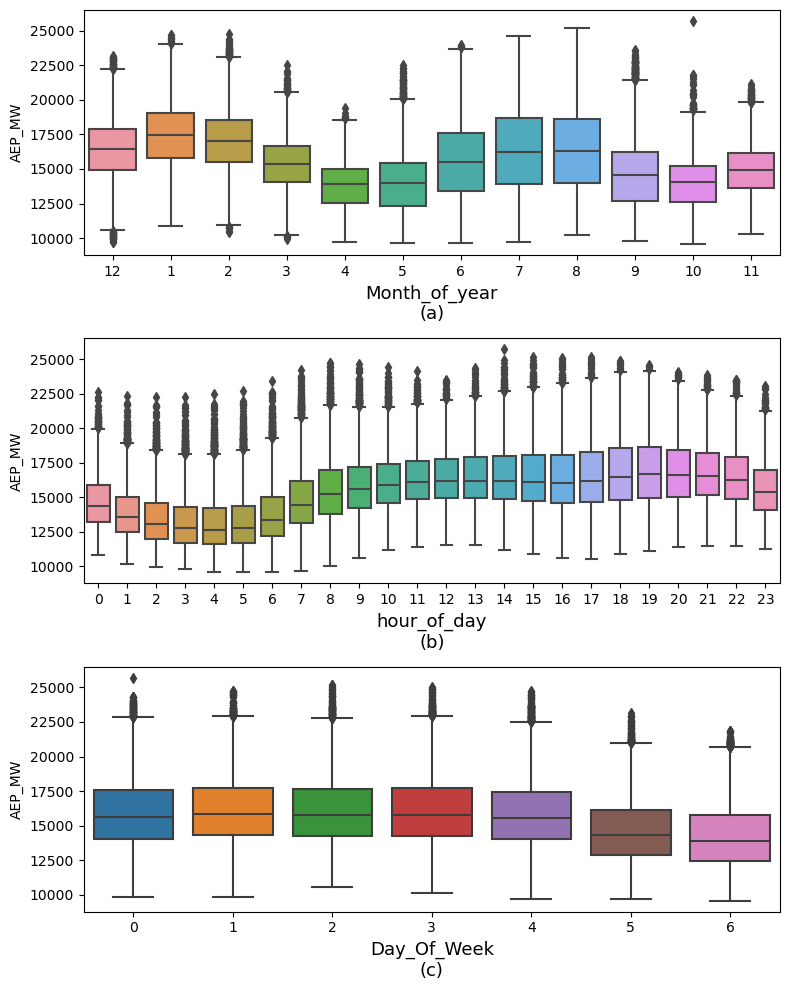

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of months starting from December
month_order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# Boxplot for Month_of_year, reordered to start from December
sns.boxplot(x='Month_of_year', y='AEP_MW', data=df, ax=axes[0], order=month_order)
axes[0].set_xlabel('Month_of_year\n(a)', fontsize=13)

# Boxplot for hour_of_day
sns.boxplot(x='hour_of_day', y='AEP_MW', data=df, ax=axes[1])
axes[1].set_xlabel('hour_of_day\n(b)', fontsize=13)

# Boxplot for Day_Of_Week
sns.boxplot(x='Day_Of_Week', y='AEP_MW', data=df, ax=axes[2])
axes[2].set_xlabel('Day_Of_Week\n(c)', fontsize=13)

plt.subplots_adjust(hspace=0.4)
plt.tight_layout()  # Adjust layout to avoid clipping

# Save the Graph (Optional)
plt.savefig(r'C:\Users\HP\OneDrive\Machine learning course\Bar_plots\boxplot_paper_1.png', dpi=900, bbox_inches='tight')

plt.show()


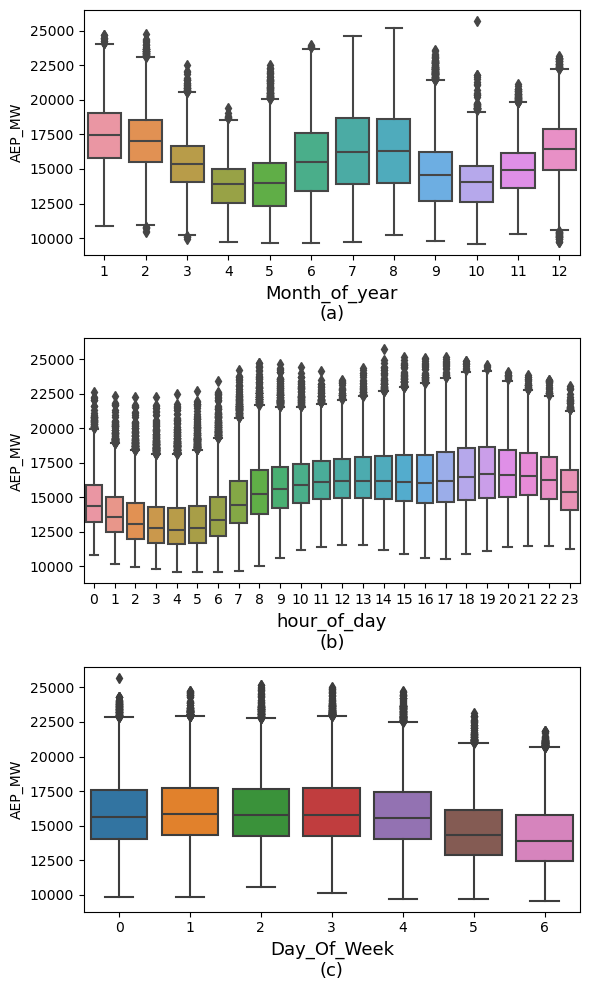

In [113]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))

sns.boxplot(x='Month_of_year', y='AEP_MW', data=df,ax=axes[0],)
axes[0].set_xlabel('Month_of_year\n(a)', fontsize=13)

sns.boxplot(x='hour_of_day', y='AEP_MW', data=df, ax=axes[1])
axes[1].set_xlabel('hour_of_day\n(b)', fontsize=13)

sns.boxplot(x='Day_Of_Week', y='AEP_MW', data=df, ax=axes[2])
axes[2].set_xlabel('Day_Of_Week\n(c)', fontsize=13)

plt.subplots_adjust(hspace=0.4)

plt.tight_layout()  # Adjust layout to avoid clipping
# Save the Graph (Optional)
#plt.savefig(r'C:\Users\HP\OneDrive\Machine learning course\Bar_plots\boxplot_paper_1.png', dpi=900, bbox_inches='tight')
plt.show()

plt.show()

In [103]:
fig.figure.savefig(r'C:\Users\HP\OneDrive\Machine learning course\AEP Datasets\Box_plot\boxplot_paper_1.jpg',dpi=600)

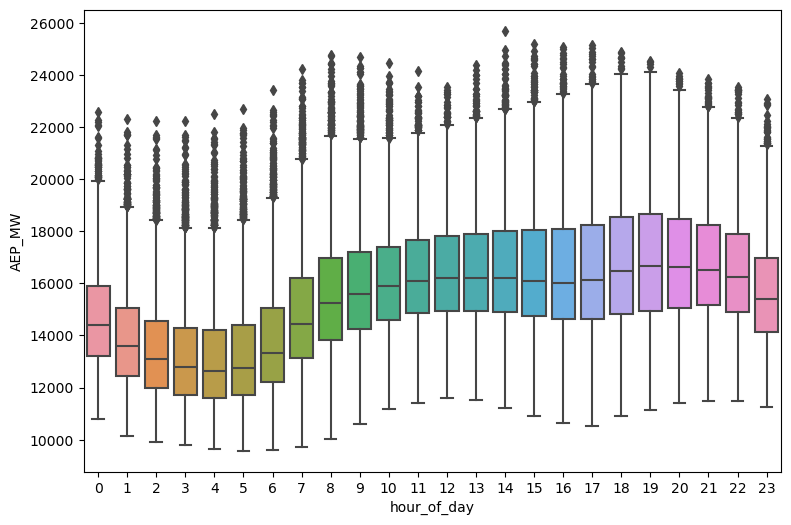

In [64]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='hour_of_day', y='AEP_MW', data=df)
axes[0].set_title('AEP_MW_by_Year')
plt.show()

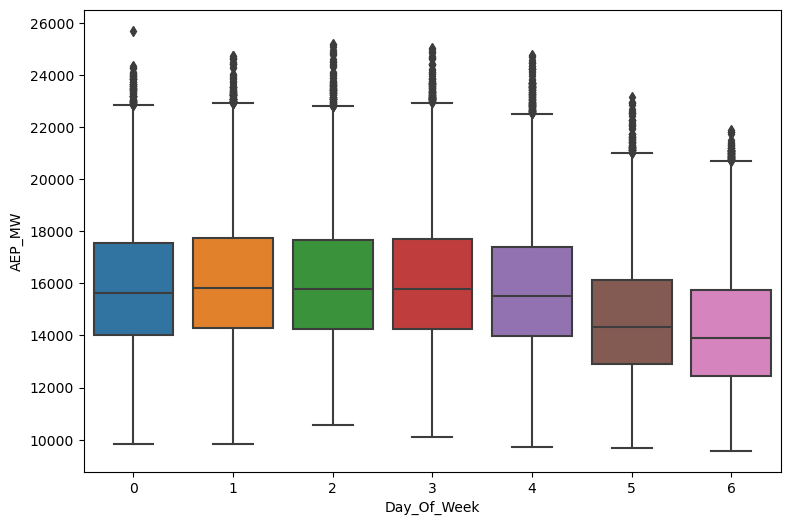

In [65]:
plt.figure(figsize=(9, 6))
sns.boxplot(x='Day_Of_Week', y='AEP_MW', data=df)
axes[0].set_title('AEP_MW_by_Year')
plt.show()